In [5]:
import starfile
import mrcfile
import pandas as pd
import argparse
import os, glob, re
import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [6]:
fnBremMrc = 'gain_bin2.mrc'
fnRelionMrc = 'relion_gain.mrc'

In [7]:
MrcBrem = mrcfile.open(fnBremMrc, mode='r+')
MrcBrem.data.shape

(4092, 5760)

In [8]:
MrcRelion = mrcfile.open(fnRelionMrc, mode='r+')
MrcRelion.data.shape

(4092, 5760)

In [9]:

m_brem = np.mean(MrcBrem.data)
std_brem = np.std(MrcBrem.data)
m_relion = np.mean(MrcRelion.data)
std_relion = np.std(MrcRelion.data)

print(f' BREM (m/std): {m_brem}, {std_brem}' )
print(f' RELION (m/std): {m_relion}, {std_relion}' )

 BREM (m/std): 1.0077935457229614, 0.026912197470664978
 RELION (m/std): 1.0006988048553467, 0.02651308849453926


Text(0.5, 1.0, 'RELION GAIN')

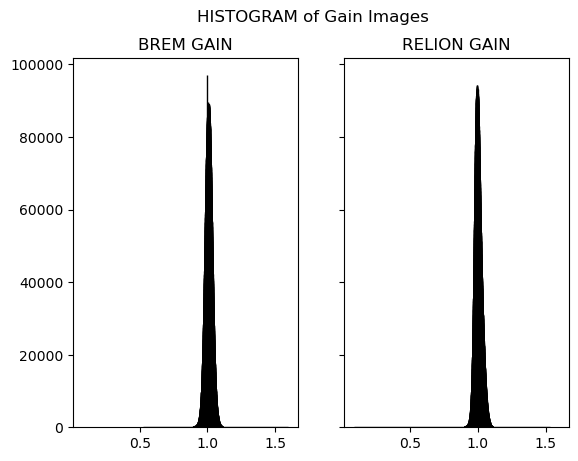

In [10]:
fig, axs = plt.subplots(1,2,sharex=True, sharey=True)
fig.suptitle('HISTOGRAM of Gain Images')
axs[0].hist(MrcBrem.data.ravel(), bins='auto', fc='k', ec='k')
axs[0].set_title('BREM GAIN')
axs[1].hist(MrcRelion.data.ravel(), bins='auto', fc='k', ec='k')
axs[1].set_title('RELION GAIN')

Text(0.5, 1.0, 'BREM GAIN rotate 180')

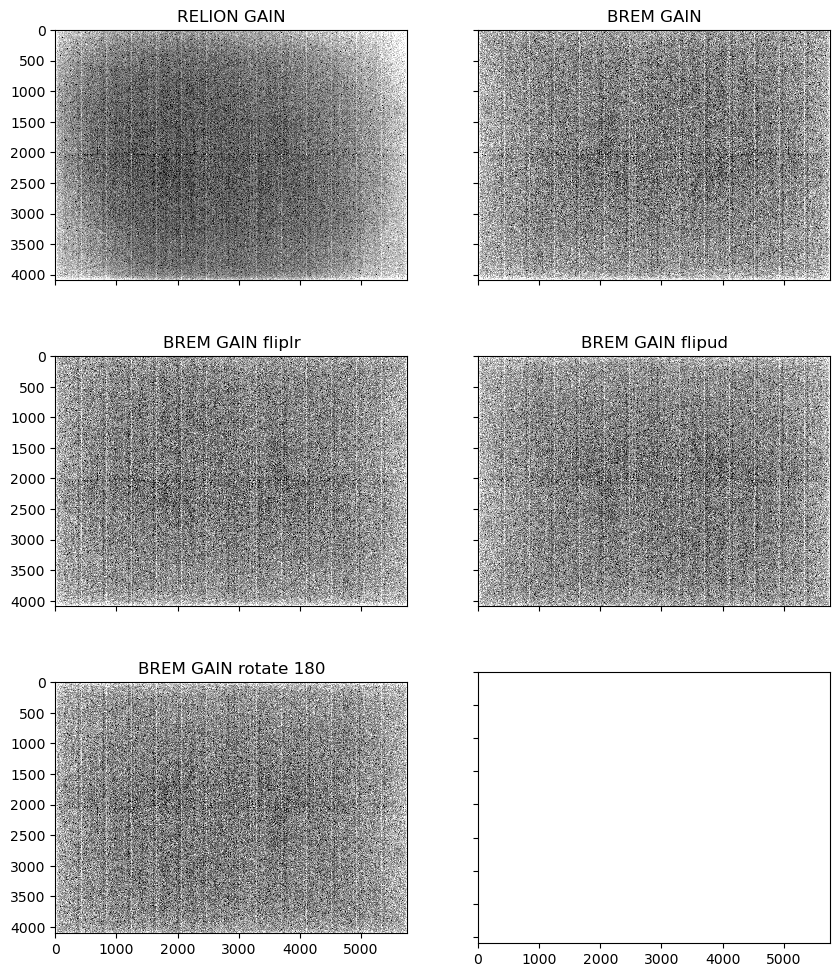

In [12]:
fig, axs = plt.subplots(3,2, sharex=True, sharey=True,figsize=(10,12))
axs[0,0].imshow(MrcRelion.data,interpolation='none', cmap='grey', clim=(0.93, 1.07))
axs[0,0].set_title('RELION GAIN')
axs[0,1].imshow(MrcBrem.data,interpolation='none', cmap='grey', clim=(0.93, 1.07))
axs[0,1].set_title('BREM GAIN')
axs[1,0].imshow(np.fliplr(MrcBrem.data),interpolation='none', cmap='grey', clim=(0.93, 1.07))
axs[1,0].set_title('BREM GAIN fliplr')
axs[1,1].imshow(np.flipud(MrcBrem.data),interpolation='none', cmap='grey', clim=(0.93, 1.07))
axs[1,1].set_title('BREM GAIN flipud')
axs[2,0].imshow(np.rot90(np.rot90(MrcBrem.data)),interpolation='none', cmap='grey', clim=(0.93, 1.07))
axs[2,0].set_title('BREM GAIN rotate 180')
#axs[2,1].imshow(MrcRelion.data,interpolation='none', cmap='grey', clim=(0.9, 1.1))#
#axs[2,1].set_title('RELION GAIN')

BELOW WE COMPARE IMAGES USING MSE and SSIM
https://www.tutorialspoint.com/how-to-compare-two-images-in-opencv-python
https://towardsdatascience.com/image-classification-using-ssim-34e549ec6e12

In [13]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

#https://scikit-image.org/docs/stable/api/skimage.metrics.html#


mse_self = mean_squared_error(MrcRelion.data, MrcRelion.data)
ssim_self = ssim(MrcRelion.data, MrcRelion.data, data_range=MrcRelion.data.max() - MrcRelion.data.min())
diff_self = MrcRelion.data - MrcRelion.data
print(mse_self,ssim_self)

mse_brem = mean_squared_error(MrcRelion.data, MrcBrem.data)
ssim_brem = ssim(MrcRelion.data, MrcBrem.data,data_range=MrcRelion.data.max() - MrcRelion.data.min())
diff_brem = MrcRelion.data - MrcBrem.data
print(mse_brem,ssim_brem)

mse_bremflr = mean_squared_error(MrcRelion.data, np.fliplr(MrcBrem.data))
ssim_bremflr = ssim(MrcRelion.data, np.fliplr(MrcBrem.data),data_range=MrcRelion.data.max() - MrcRelion.data.min())
diff_bremflr = MrcRelion.data - np.fliplr(MrcBrem.data)
print(mse_bremflr,ssim_bremflr)

mse_bremfud = mean_squared_error(MrcRelion.data, np.flipud(MrcBrem.data))
ssim_bremfud = ssim(MrcRelion.data, np.flipud(MrcBrem.data),data_range=MrcRelion.data.max() - MrcRelion.data.min())
diff_bremfud = MrcRelion.data - np.flipud(MrcBrem.data)
print(mse_bremfud,ssim_bremfud)

mse_brem180 = mean_squared_error(MrcRelion.data, np.rot90(np.rot90(MrcBrem.data)))
ssim_brem180 = ssim(MrcRelion.data, np.rot90(np.rot90(MrcBrem.data)),data_range=MrcRelion.data.max() - MrcRelion.data.min())
diff_brem180 = MrcRelion.data - np.rot90(np.rot90(MrcBrem.data))
print(mse_brem180,ssim_brem180)




0.0 1.0
0.001031491587905191 0.7096562456917019
0.00043821287904179676 0.9108135328706467
0.001018050683198788 0.709273180387359
0.000992163218348179 0.7104674742609627


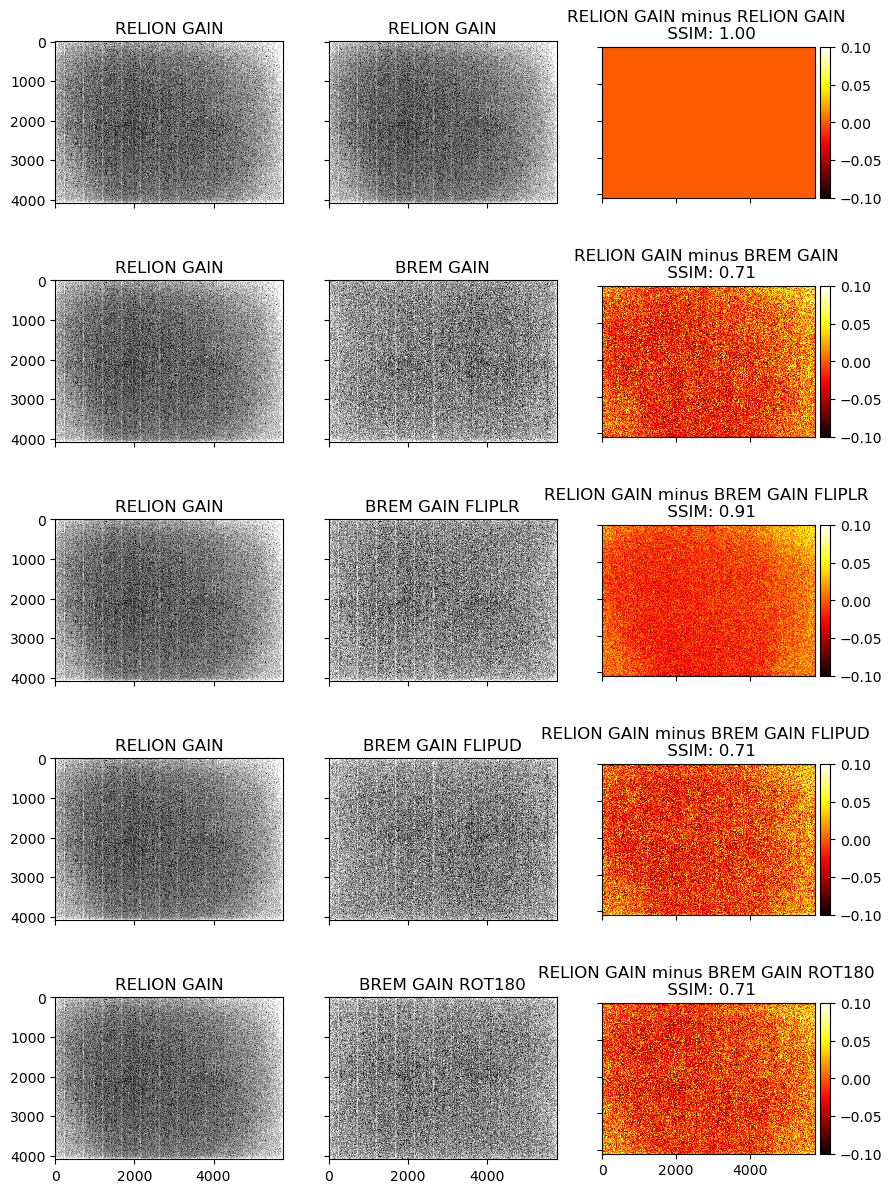

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axs = plt.subplots(5,3, sharex=True, sharey=True,figsize=(10,15)) #figsize=(10,5)

# compare self
axs[0,0].imshow(MrcRelion.data,interpolation='none', cmap='grey', clim=(0.93, 1.07))
axs[0,0].set_title('RELION GAIN')
axs[0,1].imshow(MrcRelion.data,interpolation='none', cmap='grey', clim=(0.93, 1.07))
axs[0,1].set_title('RELION GAIN')
im0 = axs[0,2].imshow(diff_self,interpolation='none', cmap='hot', clim=(-0.1, 0.1))
axs[0,2].set_title(f'RELION GAIN minus RELION GAIN \n SSIM: {ssim_self:.2f}')
divider = make_axes_locatable(axs[0,2])
cax0 = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im0, cax=cax0)


# compare no mod
axs[1,0].imshow(MrcRelion.data,interpolation='none', cmap='grey', clim=(0.93, 1.07))
axs[1,0].set_title('RELION GAIN')
axs[1,1].imshow(MrcBrem.data,interpolation='none', cmap='grey', clim=(0.93, 1.07))
axs[1,1].set_title('BREM GAIN')
im1 = axs[1,2].imshow(diff_brem,interpolation='none', cmap='hot', clim=(-0.1, 0.1))
axs[1,2].set_title(f'RELION GAIN minus BREM GAIN \n SSIM: {ssim_brem:.2f}')
divider = make_axes_locatable(axs[1,2])
cax1 = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im1, cax=cax1)

# compare fliplr
axs[2,0].imshow(MrcRelion.data,interpolation='none', cmap='grey', clim=(0.93, 1.07))
axs[2,0].set_title('RELION GAIN')
axs[2,1].imshow(np.fliplr(MrcBrem.data),interpolation='none', cmap='grey', clim=(0.93, 1.07))
axs[2,1].set_title('BREM GAIN FLIPLR')
im2 = axs[2,2].imshow(diff_bremflr,interpolation='none', cmap='hot', clim=(-0.1, 0.1))
axs[2,2].set_title(f'RELION GAIN minus BREM GAIN FLIPLR \n SSIM: {ssim_bremflr:.2f}')
divider = make_axes_locatable(axs[2,2])
cax2 = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im2, cax=cax2)

# compare flipup
axs[3,0].imshow(MrcRelion.data,interpolation='none', cmap='grey', clim=(0.93, 1.07))
axs[3,0].set_title('RELION GAIN')
axs[3,1].imshow(np.flipud(MrcBrem.data),interpolation='none', cmap='grey', clim=(0.93, 1.07))
axs[3,1].set_title('BREM GAIN FLIPUD')
im3 = axs[3,2].imshow(diff_bremfud,interpolation='none', cmap='hot' , clim=(-0.1, 0.1))
axs[3,2].set_title(f'RELION GAIN minus BREM GAIN FLIPUD \n SSIM: {ssim_bremfud:.2f}')
divider = make_axes_locatable(axs[3,2])
cax3 = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im3, cax=cax3)

# compare rot 180
axs[4,0].imshow(MrcRelion.data,interpolation='none', cmap='grey', clim=(0.93, 1.07))
axs[4,0].set_title('RELION GAIN')
axs[4,1].imshow(np.rot90(np.rot90(MrcBrem.data)),interpolation='none', cmap='grey', clim=(0.93, 1.07))
axs[4,1].set_title('BREM GAIN ROT180')
im4 = axs[4,2].imshow(diff_brem180,interpolation='none', cmap='hot', clim=(-0.1, 0.1))
axs[4,2].set_title(f'RELION GAIN minus BREM GAIN ROT180 \n SSIM: {ssim_brem180:.2f}')
divider = make_axes_locatable(axs[4,2])
cax4 = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im4, cax=cax4)

plt.savefig("compare_brem_relion_gain.pdf", format="pdf", bbox_inches="tight")

In [ ]:
fig, axs = plt.subplots(1,5,sharex=True,figsize=(10,5))
fig.suptitle('HISTOGRAM of DIFF Images')
axs[0].hist(diff_self.ravel(), bins='auto', fc='k', ec='k')
axs[0].set_title('RELION GAIN')
axs[1].hist(diff_brem.ravel(), bins='auto', fc='k', ec='k')
axs[1].set_title('BREM GAIN')
axs[2].hist(diff_bremflr.ravel(), bins='auto', fc='k', ec='k')
axs[3].set_title('BREMFLR GAIN')
axs[3].hist(diff_bremfud.ravel(), bins='auto', fc='k', ec='k')
axs[3].set_title('BREMFUD GAIN')
axs[4].hist(diff_brem180.ravel(), bins='auto', fc='k', ec='k')
axs[4].set_title('BREM180 GAIN')

In [ ]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True,figsize=(10,12))
axs[0,0].imshow(corr1,interpolation='none', cmap='grey')
axs[0,0].set_title('RELION GAIN vs RELION GAIN')
axs[0,1].imshow(corr2,interpolation='none', cmap='grey')
axs[0,1].set_title('RELION GAIN vs BREM GAIN')
#axs[1,0].imshow(np.fliplr(MrcBrem.data),interpolation='none', cmap='grey', clim=(0.9, 1.1))
#axs[1,0].set_title('BREM GAIN fliplr')
#axs[1,1].imshow(np.flipud(MrcBrem.data),interpolation='none', cmap='grey', clim=(0.9, 1.1))
#axs[1,1].set_title('BREM GAIN flipud')
#axs[2,0].imshow(np.rot90(np.rot90(MrcBrem.data)),interpolation='none', cmap='grey', clim=(0.9, 1.1))
#axs[2,0].set_title('BREM GAIN rotate 180')
#axs[2,1].imshow(MrcRelion.data,interpolation='none', cmap='grey', clim=(0.9, 1.1))#
#axs[2,1].set_title('RELION GAIN')

In [ ]:
import cv2
# 1 : relion vs relio
corr1 = cv2.filter2D(MrcRelion.data, ddepth=-1, kernel=MrcRelion.data)

corr2 = cv2.filter2D(MrcRelion.data, ddepth=-1, kernel=MrcBrem.data)

In [ ]:
from scipy import signal
corr1 = signal.correlate2d (MrcRelion.data, MrcRelion.data)
corr2 = signal.correlate2d (MrcRelion.data, MrcBrem.data)

In [ ]:
print(np.corrcoef(MrcRelion.data.flatten(), MrcRelion.data.flatten()))
print(np.corrcoef(MrcRelion.data.flatten(), MrcBrem.data.flatten()))
print(np.corrcoef(MrcRelion.data.flatten(),np.fliplr(MrcBrem.data).flatten()))
print(np.corrcoef(MrcRelion.data.flatten(),np.flipud(MrcBrem.data).flatten()))
print(np.corrcoef(MrcRelion.data.flatten(),np.rot90(np.rot90(MrcBrem.data)).flatten()))

In [ ]:
np.corrcoef(MrcRelion.data, MrcRelion.data).shape